# Visualization with Python



<img src="https://www.python.org/static/img/python-logo.png" alt="yogen" style="width: 200px; float: right;"/>
<br>
<br>
<br>
<img src="../assets/yogen-logo.png" alt="yogen" style="width: 200px; float: right;"/>

# `matplotlib`

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

## Matplotlib basic plotting

A MATLAB-like plotting framework: [`pyplot`](https://matplotlib.org/api/pyplot_api.html). 

Also known as the "state-machine environment" because we can call methods of a global state machine and they will affect the appropiate objects.

### Lines

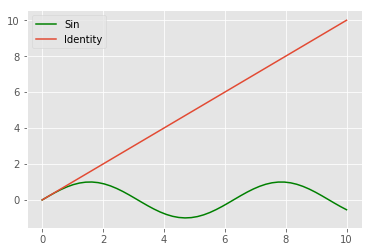

In [12]:
import numpy as np

X = np.linspace(0, 10, 50)
Y = np.sin(X)

plt.plot(X, Y, c='green')
plt.plot(X, X)
plt.legend(['Sin', 'Identity'])

#### Exercise

Plot the logistic function 


$$f(x) = \frac{e^x}{1 + e^x}$$

Between -7 and 7


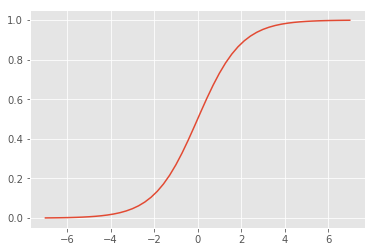

In [18]:
X = np.linspace(-7, 7, 50)
Y = np.exp(X) / (1 + np.exp(X))
plt.plot(X, Y)

### Scatter plots

Here we are using a random noise ("jitter"
) added over the (perfectly following $f(x) = 2x + 20$) Y2 Series in order to get some noisier, more real-looking generated data.


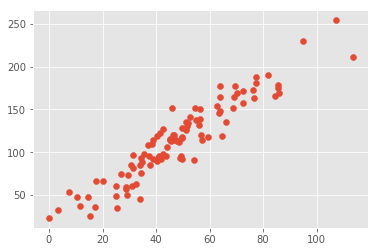

In [32]:
X2 = np.random.randn(100) * 20 + 50
Y2 = 2 * X2 + 20

jitter = np.random.randn(100) * 15

Y2_randomized = Y2 + jitter
plt.scatter(X2, Y2_randomized)

This is what happens if you make a line plot of unsorted data:

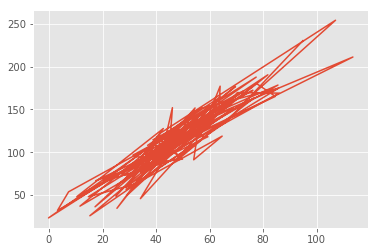

In [33]:
plt.plot(X2,Y2_randomized)

### Bar plots

Do not confuse with histograms! :P

([<matplotlib.axis.XTick at 0x7f7f9b8b74e0>,
 <a list of 3 Text xticklabel objects>)

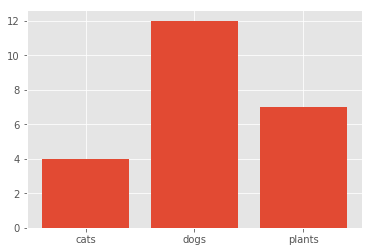

In [37]:
X3 = ['cats', 'dogs', 'plants']
Y3 = [4, 12, 7]
plt.bar(range(3), Y3)
plt.xticks(range(3), X3)

(array([  4.,   6.,  13.,  24.,  25.,  10.,  10.,   5.,   1.,   2.]),
 array([  -0.17616233,   11.19752159,   22.57120552,   33.94488944,
          45.31857336,   56.69225729,   68.06594121,   79.43962513,
          90.81330906,  102.18699298,  113.5606769 ]),
 <a list of 10 Patch objects>)

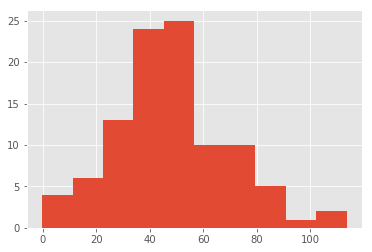

In [39]:
plt.hist(X2)

## The object-oriented interface

Essential for finer control.

The recommended procedure is to use pyplot to create figures and the object-oriented interface for plotting. 

We need to know the somewhat confusing [matplotlib terminology](http://matplotlib.org/faq/usage_faq.html#parts-of-a-figure)

![Anatomy of a Matplotlib Figure](http://matplotlib.org/_images/anatomy1.png)

#### Figure

A whole figure which may contain several Axes. It communicates with the `Canvas` for us.

#### Axes vs Axis

An `Axes` (yes, it looks like a plural noun but it's not, necessarily) is a single panel of a figure. An `Axes` contains generally 2, but sometimes 3, `Axis`. It is the object type we'll spend most time interacting with.

`Axis` objects represent the lines in the x and y (and z in the case of 3D plots) dimensions. With them you can control ticks and ticklabels.

#### Artists

There are two types of Artists: primitives and containers. The primitives represent the standard graphical objects we want to paint onto our canvas: Line2D, Rectangle, Text, AxesImage, etc., and the containers are places to put them (Axis, Axes and Figure).

https://matplotlib.org/users/artists.html

### Interlude: the recommended interface for our plotting functions

From [the matplotlib FAQ](http://matplotlib.org/faq/usage_faq.html):

```python
def my_plotter(ax, data1, data2, param_dict):
    """
    A helper function to make a graph

    Parameters
    ----------
    ax : Axes
        The axes to draw to

    data1 : array
       The x data

    data2 : array
       The y data

    param_dict : dict
       Dictionary of kwargs to pass to ax.plot

    Returns
    -------
    out : list
        list of artists added
    """
    out = ax.plot(data1, data2, **param_dict)
    return out
```

#### Exercise

Write a function following the recommended signature for custom plotting functions.

## `add_axes()`, `add_subplot`, and `subplots()` 

We can add Axes to a Figure by calling its add_axes method.

A subplot is just an Axes that we place within an imaginary grid.

For even finer control we can use [GridSpec](http://matplotlib.org/api/gridspec_api.html)

### `add_axes()`

See https://matplotlib.org/users/artists.html

Total flexibility in placing the Axes: we specify `[left, bottom, width, height]` in 0-1 relative figure coordinates.

### Subplots

We can add them with either `figure.add_subplot()` or create a figure with its subplots directly by calling `plt.subplots()`

### `plt.subplots()`

(2, 2)

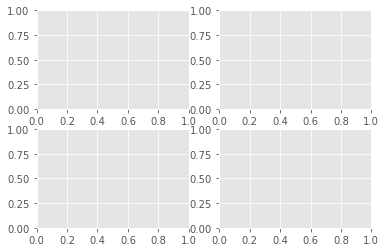

In [43]:
figure, axeses = plt.subplots(2,2)

axeses.shape

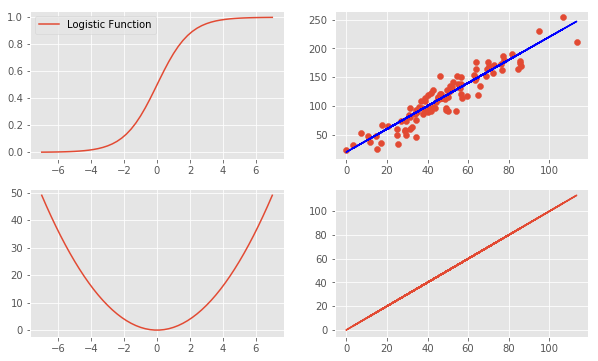

In [54]:
figure, axeses = plt.subplots(2,2)

axeses[0,0].plot(X, Y)
axeses[0,1].scatter(X2, Y2_randomized)
axeses[0,1].plot(X2, Y2, c='blue')
axeses[1,0].plot(X, X ** 2)
axeses[1,1].plot(X2, X2)

figure.set_size_inches(10,6)
axeses[0,0].legend(['Logistic Function'])

### Sharing axis

## `fill_between`

We can fill areas of the plot with solid color

The syntax is 

```python
plt.fill_between(X, Y1, Y2)
```

Where Y1 and Y2 are either `np.array`s or scalar values.

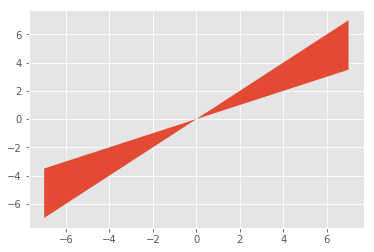

In [56]:
plt.fill_between(X, X, X / 2)

## `fill_between`(`where=`)

We can fill areas of the plot with solid color differently in different parts of the graph.

The syntax is 

```python
plt.fill_between(X, Y1, Y2, where=boolean_array)
```

Where Y1 and Y2 are either `np.array`s or scalar values, and boolean_array can be constructed from X, from Y, or from whatever you want.

#### Exercise:
Given this code:
```python
n = 256
X = np.linspace(-np.pi,np.pi,n,endpoint=True)
Y = np.sin(2*X)

plt.plot (X, Y+1, color='blue', alpha=1.00)
plt.plot (X, Y-1, color='blue', alpha=1.00)
plt.show()
```

Reproduce this plot:

![Exercise](figs/plot_ex.png)



## Line properties


### Color

See https://matplotlib.org/users/colormaps.html

![Colormaps](https://matplotlib.org/_images/grayscale_01_00.png)

#### Exercise

Given this code, try to reproduce this graphic taking care of marker size, color and transparency.

```python
n = 1024
X = np.random.normal(0,1,n)
Y = np.random.normal(0,1,n)

plt.scatter(X,Y)
plt.show()
```

![Color exercise](figs/scatter_ex.png)

### Markers and linestyles

## Other attributes

http://nbviewer.jupyter.org/github/WeatherGod/AnatomyOfMatplotlib/blob/master/AnatomyOfMatplotlib-Part3-HowToSpeakMPL.ipynb

### Histograms

## Text and Math: $\LaTeX$

$\LaTeX$ is "a high-quality typesetting system; it includes features designed for the production of technical and scientific documentation. LaTeX is the de facto standard for the communication and publication of scientific documents" ([$LaTeX$ project website](https://www.latex-project.org/)).

It's widely used for writing mathematical equations that need to be rendered accurately.

We can use it in pretty much any place we need to use text.



## Legends

## Ticks, tick labels, limits

### Ticks

### Tick labels

### Limits

# Seaborn

Seaborn is a statistical data visualization library. It's built on top of matplotlib and tries to "make a well-defined set of hard things easy" ([introduction to Seaborn](http://seaborn.pydata.org/introduction.html)).

One advantage over matplotlib is that it works natively with DataFrame objects.


https://www.datacamp.com/community/tutorials/seaborn-python-tutorial



#### Exercise:

Load the `houses.csv` file into memory as a pandas `DataFrame`. Inspect its head. Clean the column names.

## Seaborn vs matplotlib



## Distribution plots

https://seaborn.pydata.org/tutorial/distributions.html

### Scatter plots

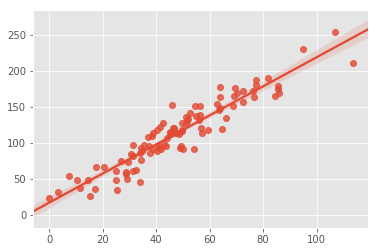

In [58]:
import seaborn as sns

sns.regplot(X2, Y2_randomized)

### Histogram

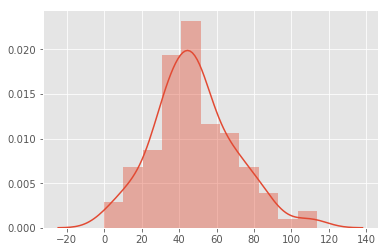

In [59]:
sns.distplot(X2)

"kde" stands for "[kernel density estimation](https://en.wikipedia.org/wiki/Kernel_density_estimation)"

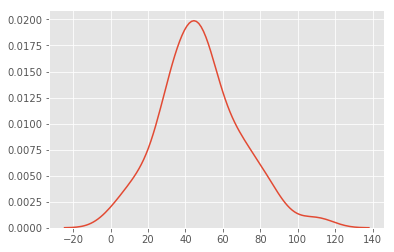

In [60]:
sns.kdeplot(X2)

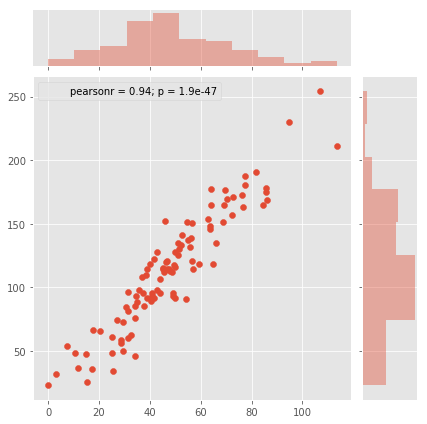

In [64]:
sns.jointplot(X2, Y2_randomized)

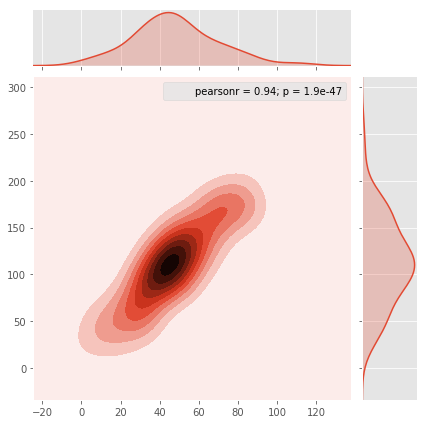

In [66]:
sns.jointplot(X2, Y2_randomized, kind='kde')

In [70]:
import pandas as pd

tips = pd.read_csv('tips.csv')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


My favorite kind of plot:

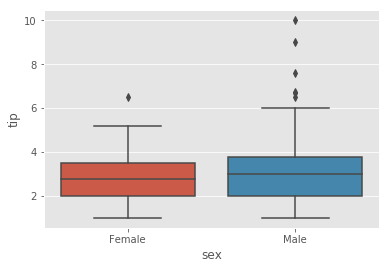

In [73]:
sns.boxplot(data=tips, x='sex', y='tip')

More on [distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html)

### Pairwise relationships

## Linear relationships

https://seaborn.pydata.org/tutorial/regression.html

### `lmplot()`

## Categorical data

https://seaborn.pydata.org/tutorial/categorical.html

### Swarm plot

### Boxplot

### Barplot / countplot

### Pointplot

## Other types

### Heatmap

### Clustermap

# Bokeh

Bokeh "is a Python interactive visualization library that targets
modern web browsers for presentation". 

Two components: A Python backend and a JS frontend. 

The way we use it is to declare our graphs in Python. 

The Python objects will in turn generate a series of JSON objects that describe a _scenegraph_. The JS component will generate the actual visualization from that scenegraph. The upside of this is that we don't need to work with JS, but our visualizations will be browser-based and interactive

https://bokeh.pydata.org/en/latest/docs/gallery.html

https://bokeh.pydata.org/en/latest/

### Scatterplot

### Controlling line/marker properties

https://bokeh.pydata.org/en/latest/docs/reference/palettes.html

#### Selected and non-selected glyphs

#### Tools

https://bokeh.pydata.org/en/latest/docs/user_guide/tools.html

#### Exercise

Perform a linear regression on a set of data generated with `generate_points()`. Plot both the points and the line of best fit with Bokeh.

#### Bonus 

Plot the residuals on the same graph.

**Hint**: check out [this page](http://bokeh.pydata.org/en/latest/docs/user_guide/plotting.html) in the Bokeh documentation, it might prove useful.

## Bokeh Server

Bokeh's architecture lends itself very naturally to a remote server-client use case.

https://bokeh.pydata.org/en/latest/docs/user_guide/server.html


# Plotly

https://www.analyticsvidhya.com/blog/2017/01/beginners-guide-to-create-beautiful-interactive-data-visualizations-using-plotly-in-r-and-python/

Plotly is a multi-language tool for creating interactive visualizations. It's built on top  of D3.

### Bar charts

In [56]:
data = [go.Bar(
            x=['giraffes', 'orangutans', 'monkeys'],
            y=[20, 14, 23]
    )]

py.offline.iplot(data, filename='basic-bar')

### Boxplot

## Dash

"Shiny for Python" 


https://plot.ly/dash/getting-started-part-2

# See Also: Vega

http://vega.github.io/

# Facets

[Facets](https://pair-code.github.io/facets/) is a research project by the [PAIR](https://ai.google/pair) research group at google. This is the same people that released [deeplearning.js](https://deeplearnjs.org/) recently.

Two components: Facets Overview and Facets Dive

# Additional references

[Matplotlib documentation](http://matplotlib.org/contents.html)

[The matplotlib FAQ](http://matplotlib.org/faq/usage_faq.html)

[Matplotlib cheat sheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Matplotlib_Cheat_Sheet.pdf)

[Nicolas P. Rougier's matplotlib tutorial](http://www.labri.fr/perso/nrougier/teaching/matplotlib/)

[Anatomy of Matplotlib](https://github.com/matplotlib/AnatomyOfMatplotlib)

[$\LaTeX$](https://www.latex-project.org/)

# Additional references

[Bokeh User Guide](http://bokeh.pydata.org/en/latest/docs/user_guide.html)

[Bokeh Tutorials](http://nbviewer.jupyter.org/github/bokeh/bokeh-notebooks/blob/master/index.ipynb)

[Dash](https://plot.ly/dash/)

[Dash being spotted before release](https://www.reddit.com/r/Python/comments/6imhxa/plotly_has_just_released_dash_20_a_shinylike_tool/)

[Facets](https://pair-code.github.io/facets/)

[Facets release Google research blog entry](https://research.googleblog.com/2017/07/facets-open-source-visualization-tool.html)